### Problem statement
Classification: Naïve Bayes

Dataset: pima-indians-diabetes.csv

Use probabilistic approach to implement Classifier model. Evaluate the
performance of the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [2]:
pima = pd.read_csv('../all_datasets/Decision Tree & Naive Bayes Classification/pima-indians-diabetes.csv')
pima


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Define column names based on the information you provided
column_names = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

pima.columns = column_names

pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


We have to predict whether or not the patients in the dataset have diabetes or not?

So let us check how many people have diabetes and how many of them do not

In [4]:
pima['Outcome'].value_counts()


0    500
1    267
Name: Outcome, dtype: int64

<AxesSubplot:>

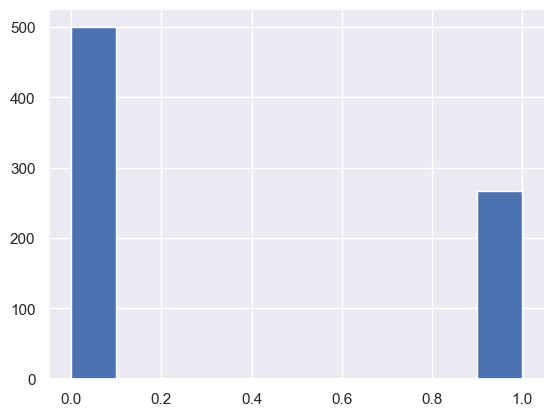

In [6]:
pima['Outcome'].hist()